<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Sadi_Nicolas_Mendoza_Soriano_Lab3Phase_Plane_Analysis_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Campos Vectoriales Planares

Para sistemas de EDOs en 2D es posible tener una descripción cualitativa y geométrica del comportamiento del sistema
gracias a que podemos visualizar el comportamiento de las 2 variables en un plano.

Este cuaderno explora el modelo FitzHugh-Nagumo, un sistema simplificado que describe el comportamiento de membranas neuronales. Dividiremos el análisis en varias secciones: cálculo del retrato de fase, cálculo de las curvas nulas (nullclines), identificación de puntos de equilibrio y su estabilidad, y exploraremos cómo una bifurcación puede ser inducida por cambios en la corriente externa.

Para este análisis, usamos las ecuaciones:

$$
\frac{dV}{dt}=V-\frac{V^3}{3}-w+I_{ext} \\
\frac{dw}{dt}=\frac{1}{\tau}(V+a-bw)
$$

donde:

- $V$: Potencial de membrana.
- $w$: Variable de recuperación
- $I_{ext}$: Corriente externa constante.
- $a$, $b$, y $\tau$: parámetros de ajuste.

Usando los valores de parámetros $a = 0.3$, $b = 1.4$ y $\tau = 20$, realice los siguientes ejercicios:

## Ejercicio 1: Protocolo de Estimulación por pulsos

Simule el sistema de FN en el intervalo (-50,300) el -50 hace que cuando grafiquemos el tiempo desde 0, el sistema habrá ya evolucionado hacia el atractor adecuado. Use un protocolo de estimulación usando $I_{ext}(t)$ = 0.05 en el
intervalo $10<t<15$, 0.1 en $110<t<115$ y 0.15 en $210<t<215$.

Grafique las soluciones de $V$y $w$ en el tiempo, grafique en un panel debajo también la corriente de estimulación. Finalmente en otro panel muestre el resultado de las trayectorias en el espacio de estados. Describa sus observaciones.

In [ ]:
# TODO
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#parametros

a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0.05 en el intervalo  10<t<15 , 0.1 en  110<t<115  y 0.15 en  210<t<215 .

def I_ext(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t<10:
        return 0
    elif 10<t and t<15:
        return 0.05

    elif t>=110 and 115>t:
        return 0.1

    elif t>=210 and 215>t:
        return 0.15
    else:
        return 0


def ecuaciones_a_resolver(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = I_ext(t)
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-50,300]
x0 = [0,0]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso





In [ ]:
#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)

#EVALUACION DEL TIEMPO
x = np.linspace(tspan[0],tspan[-1],50000)
evaluaciones_i  = list()
for i in x:
    evaluaciones_i.append(I_ext(i))

# GRAFICAS

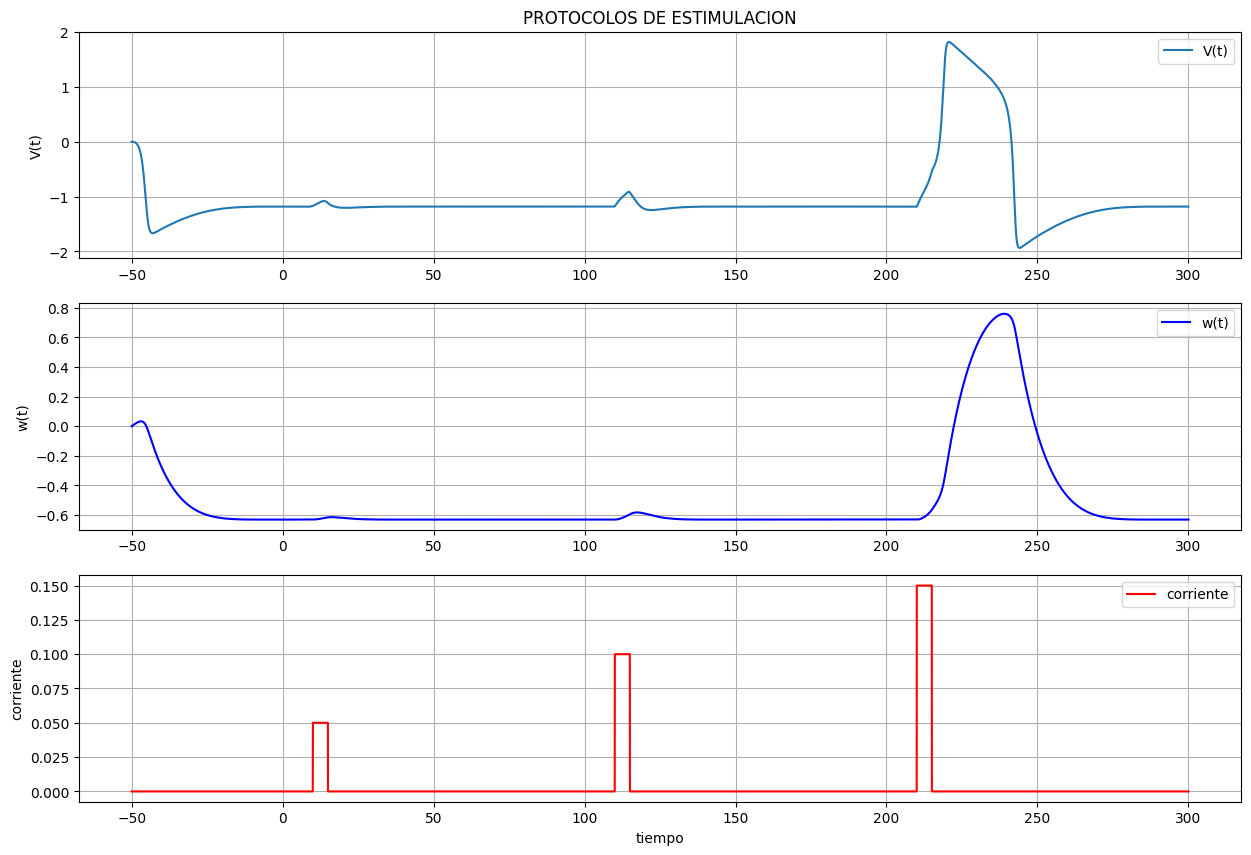

In [ ]:

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.title('PROTOCOLOS DE ESTIMULACION')
plt.plot(tiempo_denso,V1,label='V(t)')
plt.ylabel('V(t)')
plt.legend()
plt.grid()


plt.subplot(3,1,2)
plt.plot(tiempo_denso,w1,label='w(t)', color = 'b')
plt.ylabel('w(t)')
plt.legend()
plt.grid()


plt.subplot(3,1,3)
plt.plot(x,evaluaciones_i, label = 'corriente', color = 'r')
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.grid()
plt.show()


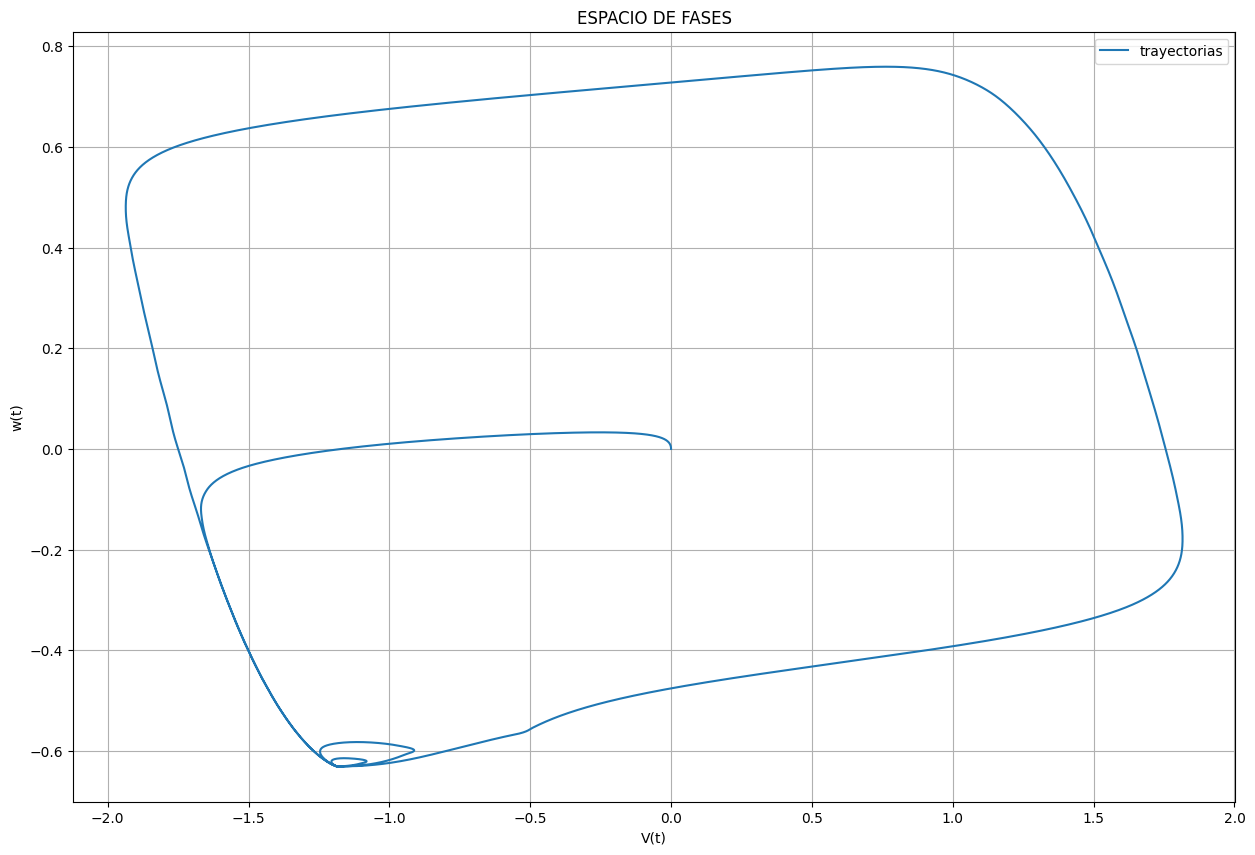

In [ ]:
#ESPACIO DE FASES
plt.figure(figsize=(15,10))
plt.title('ESPACIO DE FASES')

plt.plot(V1,w1,label='trayectorias')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.show()


## Ejercicio 2: Protocolo de estimulación DC

Repita el ejercicio anterior pero usando una corriente constante igual a $I_{ext}=0.23$ en el intervalo $10<t<260$. Describa nuevamente lo observado.

In [ ]:
# TODO

#parametros

a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0.05 en el intervalo  10<t<15 , 0.1 en  110<t<115  y 0.15 en  210<t<215 .

def I_ext(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t<10:
        return 0
    elif 10<t and t<260:
        return 0.23
    else:
        return 0


def ecuaciones_a_resolver(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = I_ext(t)
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-50,300]
x0 = [0,0]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso


#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)

#EVALUACION DEL TIEMPO

evaluaciones_i  = list()
for i in x:
    evaluaciones_i.append(I_ext(i))


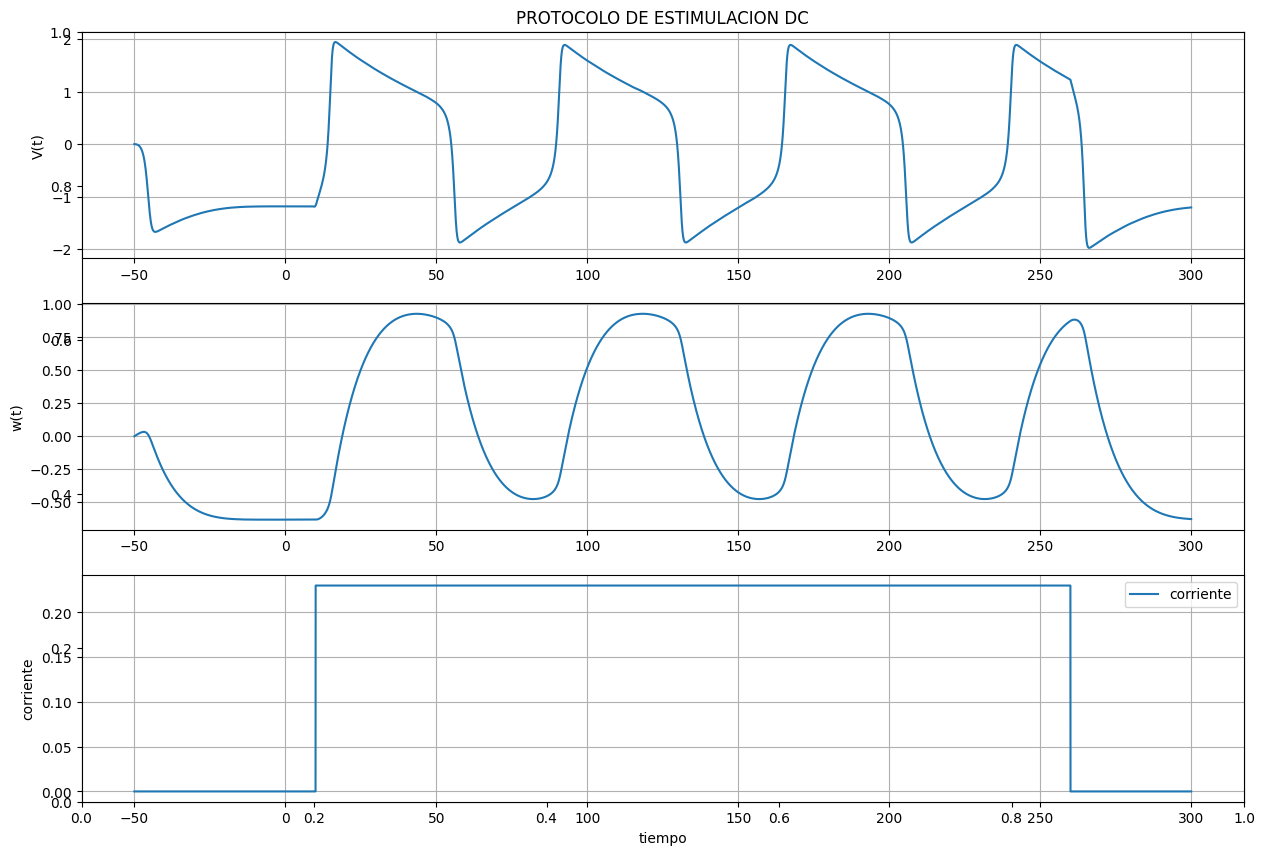

In [ ]:
plt.figure(figsize=(15,10))
plt.title('PROTOCOLO DE ESTIMULACION DC')
plt.subplot(3,1,1)
plt.plot(tiempo_denso,V1,label='V(t)')
plt.ylabel('V(t)')
plt.grid()


plt.subplot(3,1,2)
plt.plot(tiempo_denso,w1,label='w(t)')
plt.ylabel('w(t)')
plt.grid()


plt.subplot(3,1,3)
plt.plot(x,evaluaciones_i, label = 'corriente')
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.grid()
plt.show()

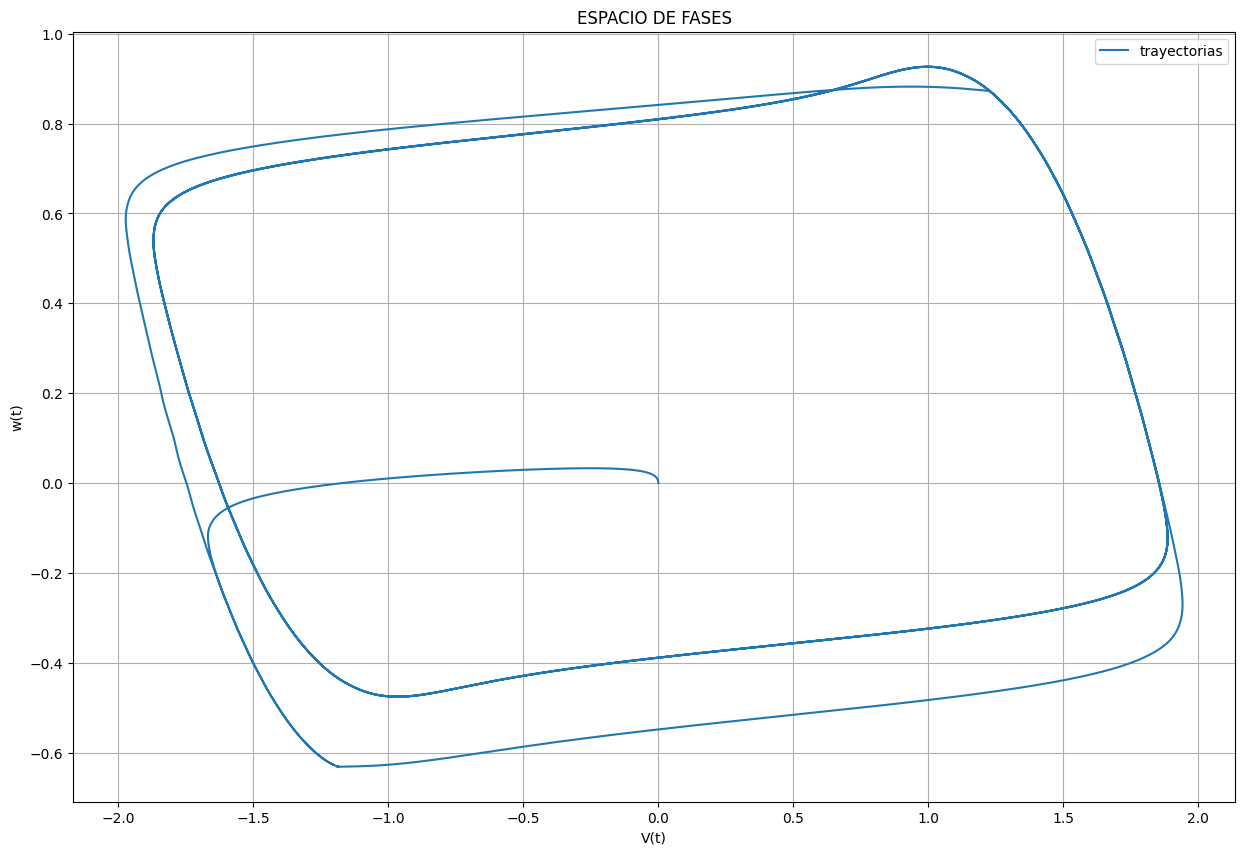

In [ ]:
plt.figure(figsize=(15,10))
plt.title('ESPACIO DE FASES')
plt.plot(V1,w1,label='trayectorias')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()

## Ejercicio 3: Retrato de Fase

Aquí se representa visualmente el comportamiento del sistema en el espacio de fases, trazando los campos de vectores para diferentes valores de $V$ y $w$. Un retrato de fase permite identificar las trayectorias y los patrones de estabilidad del sistema.

Usando el valor de corriente $I_{ext}=0$ cree el retrato de fase usando la ayuda del comando *meshgrid* para generar el camo vectorial, y ayúdese del comando de matplotlib *streamplot* para graficarlo. En el mismo gráfico muestre 3 trayectorias representativas con condiciones iniciales a su gusto.

In [ ]:
# TODO
# TODO

#parametros

a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0.05 en el intervalo  10<t<15 , 0.1 en  110<t<115  y 0.15 en  210<t<215 .

def I_ext(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
        return 0


def ecuaciones_a_resolver(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = 0
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-3000,3000]
x0 = [0,0]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso


#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)






In [ ]:
x0 = [-4,4]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )
#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V12,w12 =solucion.sol(tiempo_denso)

In [ ]:
x0 = [0,-4]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )
#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V2,w2 =solucion.sol(tiempo_denso)

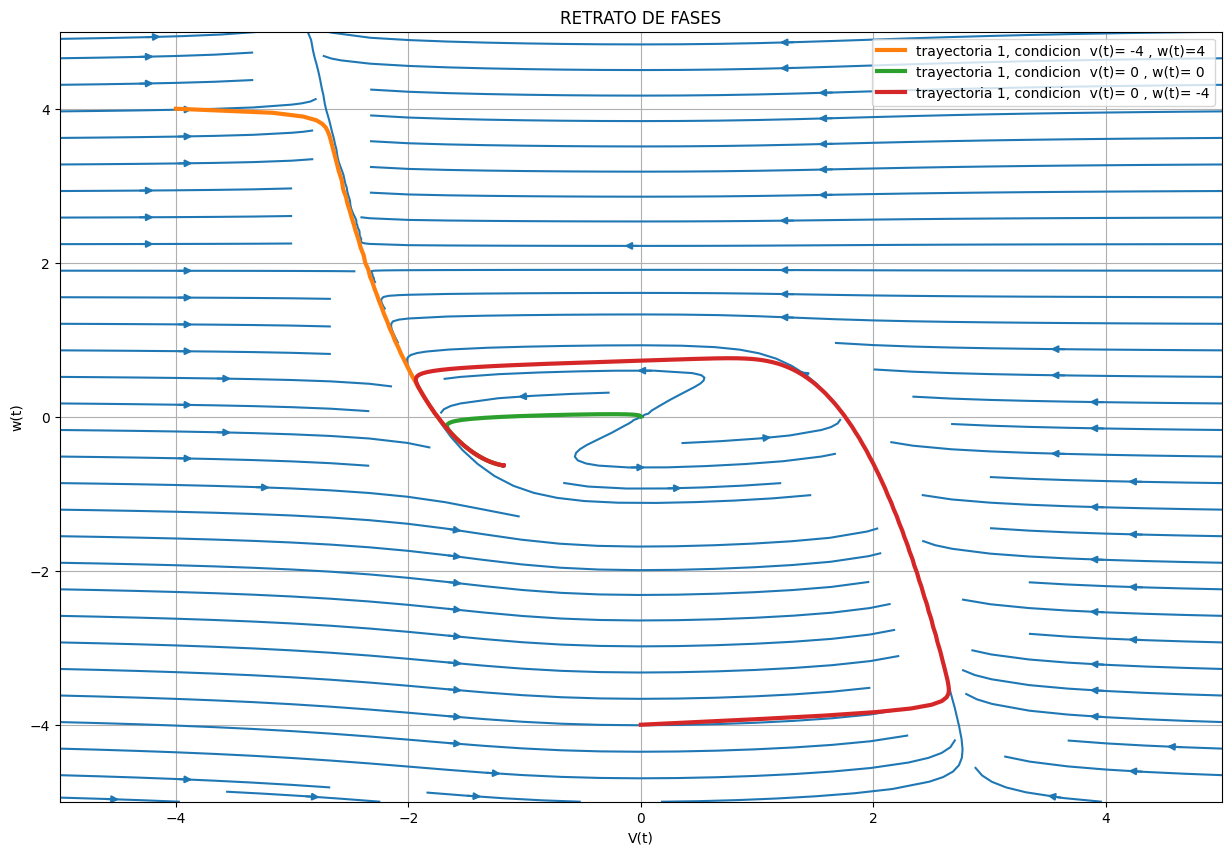

In [ ]:
a = np.linspace(-5,5,100)
b =a = np.linspace(-5,5,100)
V,W = np.meshgrid(a,b)
I = 0
ecu1 = V-(V**3)/3-W+I
ecu2 = 1/tau*(V+a-b*W)

x = np.linspace(-5,5,100)





plt.figure(figsize=(15,10))
plt.title('RETRATO DE FASES')
plt.streamplot(V,W,ecu1,ecu2)
plt.plot(V12,w12, linewidth=3, label = 'trayectoria 1, condicion  v(t)= -4 , w(t)=4')
plt.plot(V1,w1, linewidth=3, label = 'trayectoria 1, condicion  v(t)= 0 , w(t)= 0')
plt.plot(V2,w2, linewidth=3, label = 'trayectoria 1, condicion  v(t)= 0 , w(t)= -4')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 4: Curvas Nulas (Nullclines)

Las curvas nulas (nullclines) representan las regiones en el espacio de fases donde la derivada de $V$ o $w$ es cero. Estas curvas son útiles para localizar los puntos de equilibrio del sistema.

Curva nula de $V$: $w = V-\frac{V^3}{3}+I_{ext}$.

Curva nula de $w$: $w = \frac{V+a}{b}$

Agregue al retrato de fase las nulclinas.

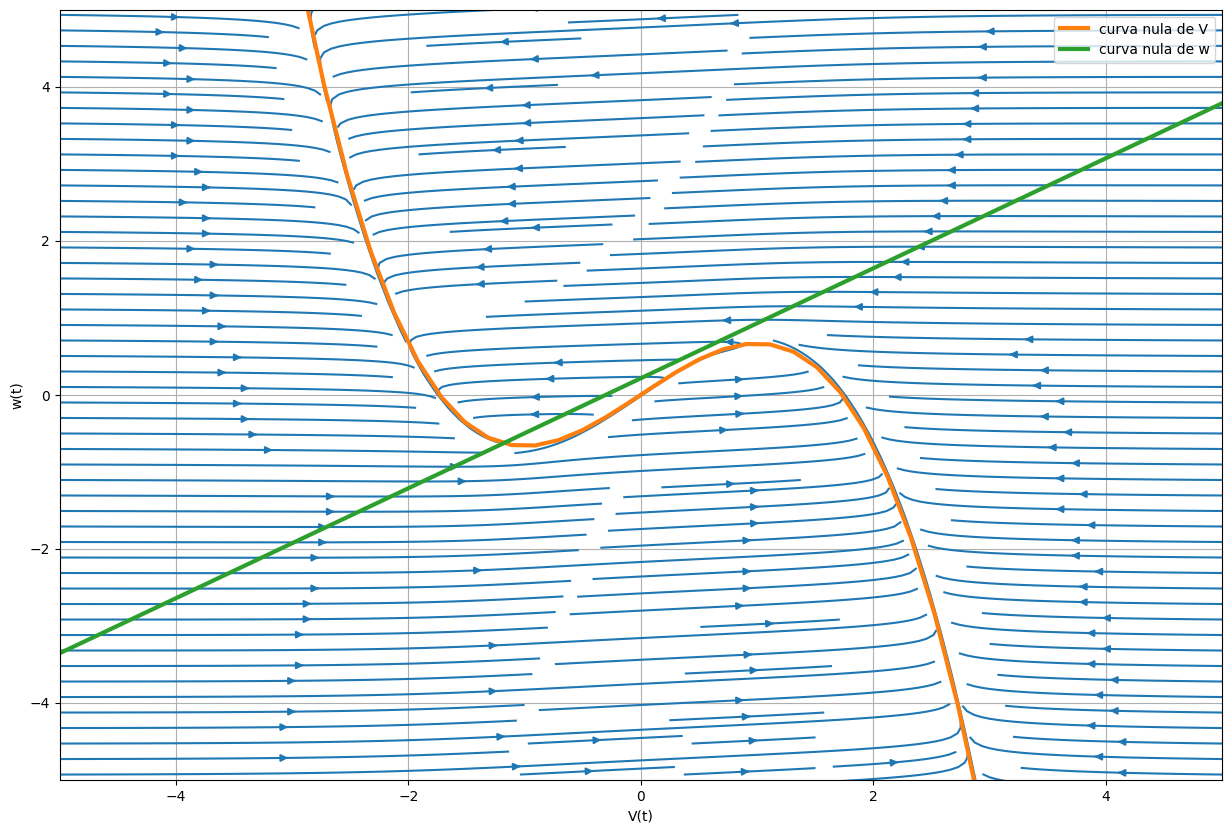

In [ ]:
# TODO
k = np.linspace(-5,5,100)
u = np.linspace(-15,15,100)
V,W = np.meshgrid(k,u)
I = 0



ecu1 = V-(V**3)/3-W+I
ecu2 = 1/tau*(V+a-b*W)


z= np.linspace(-10,10,100)
V_0z = z-(z**3)/3

w_0z = (z+a)/b






plt.figure(figsize=(15,10))
plt.streamplot(V,W,ecu1,ecu2, density = 5)
plt.plot(z,V_0z, label = 'curva nula de V', linewidth = 3)
plt.plot(z,w_0z, label = 'curva nula de w', linewidth = 3)
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.show()

## Ejercicio 5: Puntos de Equilibrio y Estabilidad

Los puntos de equilibrio son las intersecciones de las curvas nulas. O lo que es lo mismo la solución simultánea del r.h.s de la ecuación diferencial,

$$
0=V-\frac{V^3}{3}-w+I\\
0=V+a-bw
$$

De la segunda ecuación tenemos que $w = \frac{1}{b}(V+a)$ y que al ser reeemplazada en la primera nos queda el polinomio cúbico $\frac{1}{3}V^3 + V(\frac{1}{b}-1)+(\frac{a}{b}-I)=0$. Así los equilibrios se hallan econtrando las raíces del polinomio cúbico.

Para determinar la estabilidad de cada equilibrio hallado, calculamos el Jacobiano:

$$
J = \begin{pmatrix} \frac{\partial f_V}{\partial V} & \frac{\partial f_V}{\partial w} \\ \frac{\partial f_w}{\partial V} & \frac{\partial f_w}{\partial w} \end{pmatrix} = \begin{pmatrix} 1 - V^2 & -1 \\ \frac{1}{\tau} & -\frac{b}{\tau} \end{pmatrix}
$$

Evaluamos el Jacobiano en cada punto de equilibrio y calculamos sus valores propios.

Calcule el punto de equilibrio para el sistema que estamos estudiando e identifique si es estable o inestable. Grafíquelo en la figura que estamos haciendo colocando un símbolo relleno en caso de que el punto se estable y un símbolo vacío en caso de que sea inestable.

Pista: Use el comando *roots* de numpy para hallar las raices del polinomio


In [ ]:
# TODO


a = 0.3
b = 1.4

coefficientes =  [1/3, 0, (1/b - 1),a/b]       #lista de coeficientes
roots = np.roots(coefficientes)                #raices de los coaeficientes
cual_real= np.isreal(roots)                    #verificamos cual de los retornos del array son reales
raices_reales = roots[cual_real].real          #buscamos al evaluar en el arreglo de root y extraemos las reales
x_ = raices_reales                             #
y_ =1/b*(x_ + a)
print(type(x_))


<class 'numpy.ndarray'>


In [ ]:

def defenir_estabilidad(equilibrio):
    for equilibrio in equilibrio:  #para cada equilibrio

        jaco = np.array([[1 - equilibrio**2,-1], [1/tau,-b/tau]])  #calcular el jacobiano dado
        eigvalues_ev = np.linalg.eigvals(jaco)                     #eigen valores del jacobiano


        if all(eigvalues_ev > 0):

            return 'inestable'

        elif all(eigvalues_ev < 0):          #con las funciones all que segun la documentacion
                                                                    #Pruebe si todos los elementos de la matriz a lo
                                                                    #largo de un eje determinado se evalúan como Verdadero
            return 'estable'                                        #dependiendo de la evaluacion retornara estable y sino inestable
        else:

            return 'silla'

print(defenir_estabilidad(x_))


estable


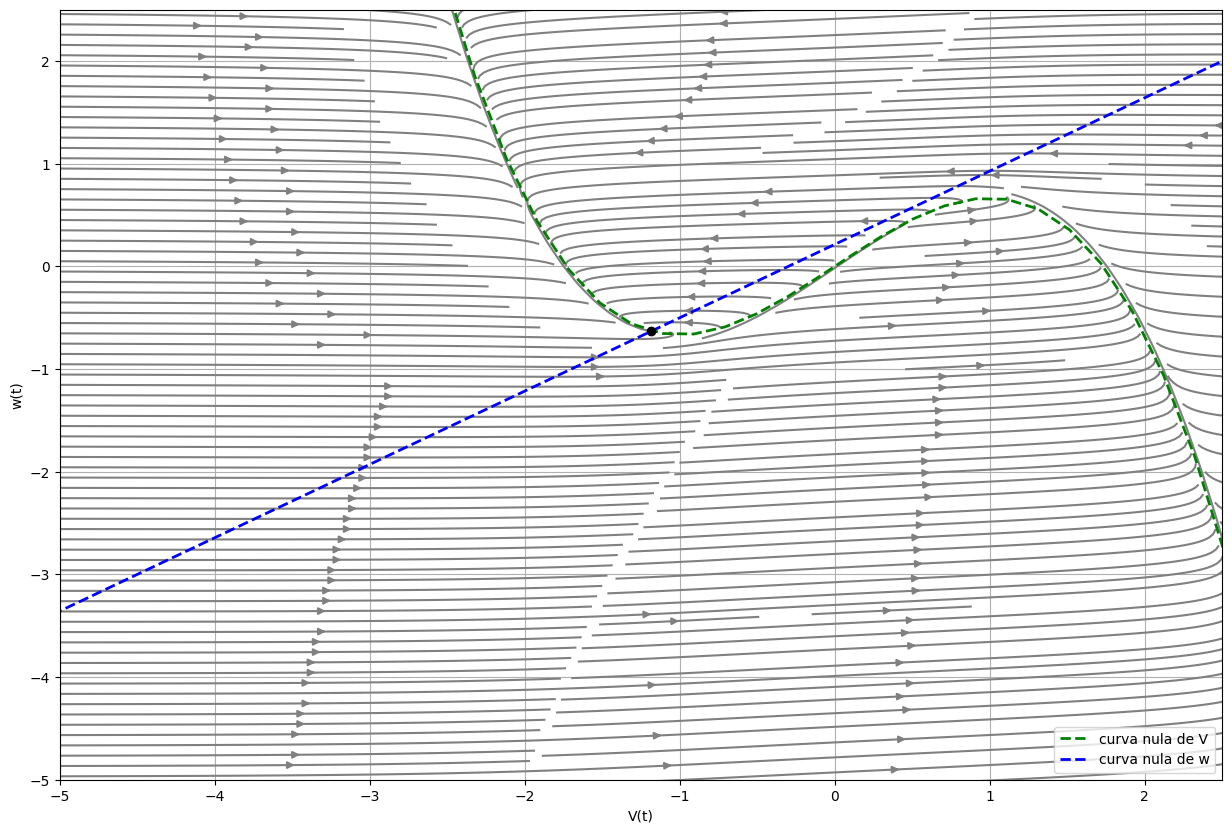

In [ ]:
plt.figure(figsize=(15,10))
plt.streamplot(V,W,ecu1,ecu2,density=10 , color  = 'grey' )
plt.plot(z,V_0z,'g--' ,label = 'curva nula de V', linewidth = 2)
plt.plot(z,w_0z,'b--' ,label = 'curva nula de w', linewidth = 2)
plt.plot(x_,y_,'o',color = 'black')
plt.xlabel('V(t)')

plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.show()

## Ejercicio 6: Comparación de retratos de fase

Muestre en una figura con 3 paneles diferentes el retrato de fase completo (con todos los elementos calculados en los puntos 2 a 5) del sistema de FN para 3 valores diferentes de corriente: $I_{ext} = 0, 0.2, 0.4$

In [ ]:
# TODO